# Rate Coding

In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import numpy as np

path = "/data/fashion_mnist"

transform = transforms.Compose([
            transforms.Resize((28,28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

#data = datasets.MNIST("/data/mnist", train=True, download=True, transform=transform)
train_data = datasets.FashionMNIST(path, train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(path, train=False, transform=transform, download=True)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /data/fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to /data/fashion_mnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /data/fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /data/fashion_mnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /data/fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /data/fashion_mnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /data/fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /data/fashion_mnist/FashionMNIST/raw



In [ ]:
nb_inputs  = 28*28
nb_hidden  = 100
nb_outputs = 10

time_step = 1e-3
nb_steps  = 100

In [ ]:
# Check whether a GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")     
else:
    device = torch.device("cpu")


In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

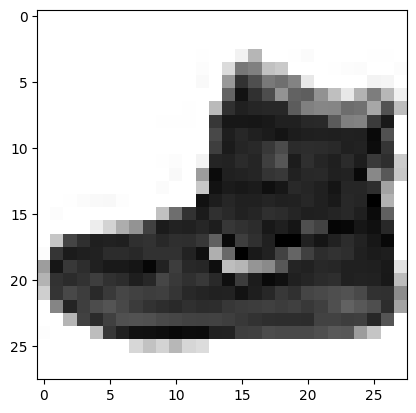

In [ ]:
plt.imshow(train_data[0][0][0],plt.cm.binary)

In [ ]:
x_train = np.array(train_data.data, dtype=float)
x_test = np.array(test_data.data, dtype=float)
y_train = np.array(train_data.targets, dtype=int)
y_test  = np.array(test_data.targets, dtype=int)

In [ ]:
num_steps = 100
raw_image = np.array(train_data[0][0][0])
rate_coded_image= []
for vector in raw_image:
  rate_coded_image_vector= []
  for pixel in vector:
    rate_coded_vector = np.random.binomial(1, pixel,num_steps)
    rate_coded_image_vector.append(rate_coded_vector)
    print(rate_coded_vector)
    print(rate_coded_vector.shape)
    print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")
  rate_coded_image.append(rate_coded_image_vector)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(100,)
The output is spiking 0.00% of the time.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(100,)
The output is spiking 0.00% of the time.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(100,)
The output is spiking 0.00% of the time.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(100,)
The output is spiking 0.00% of th

In [ ]:
rate_coded_image = np.array(rate_coded_image)

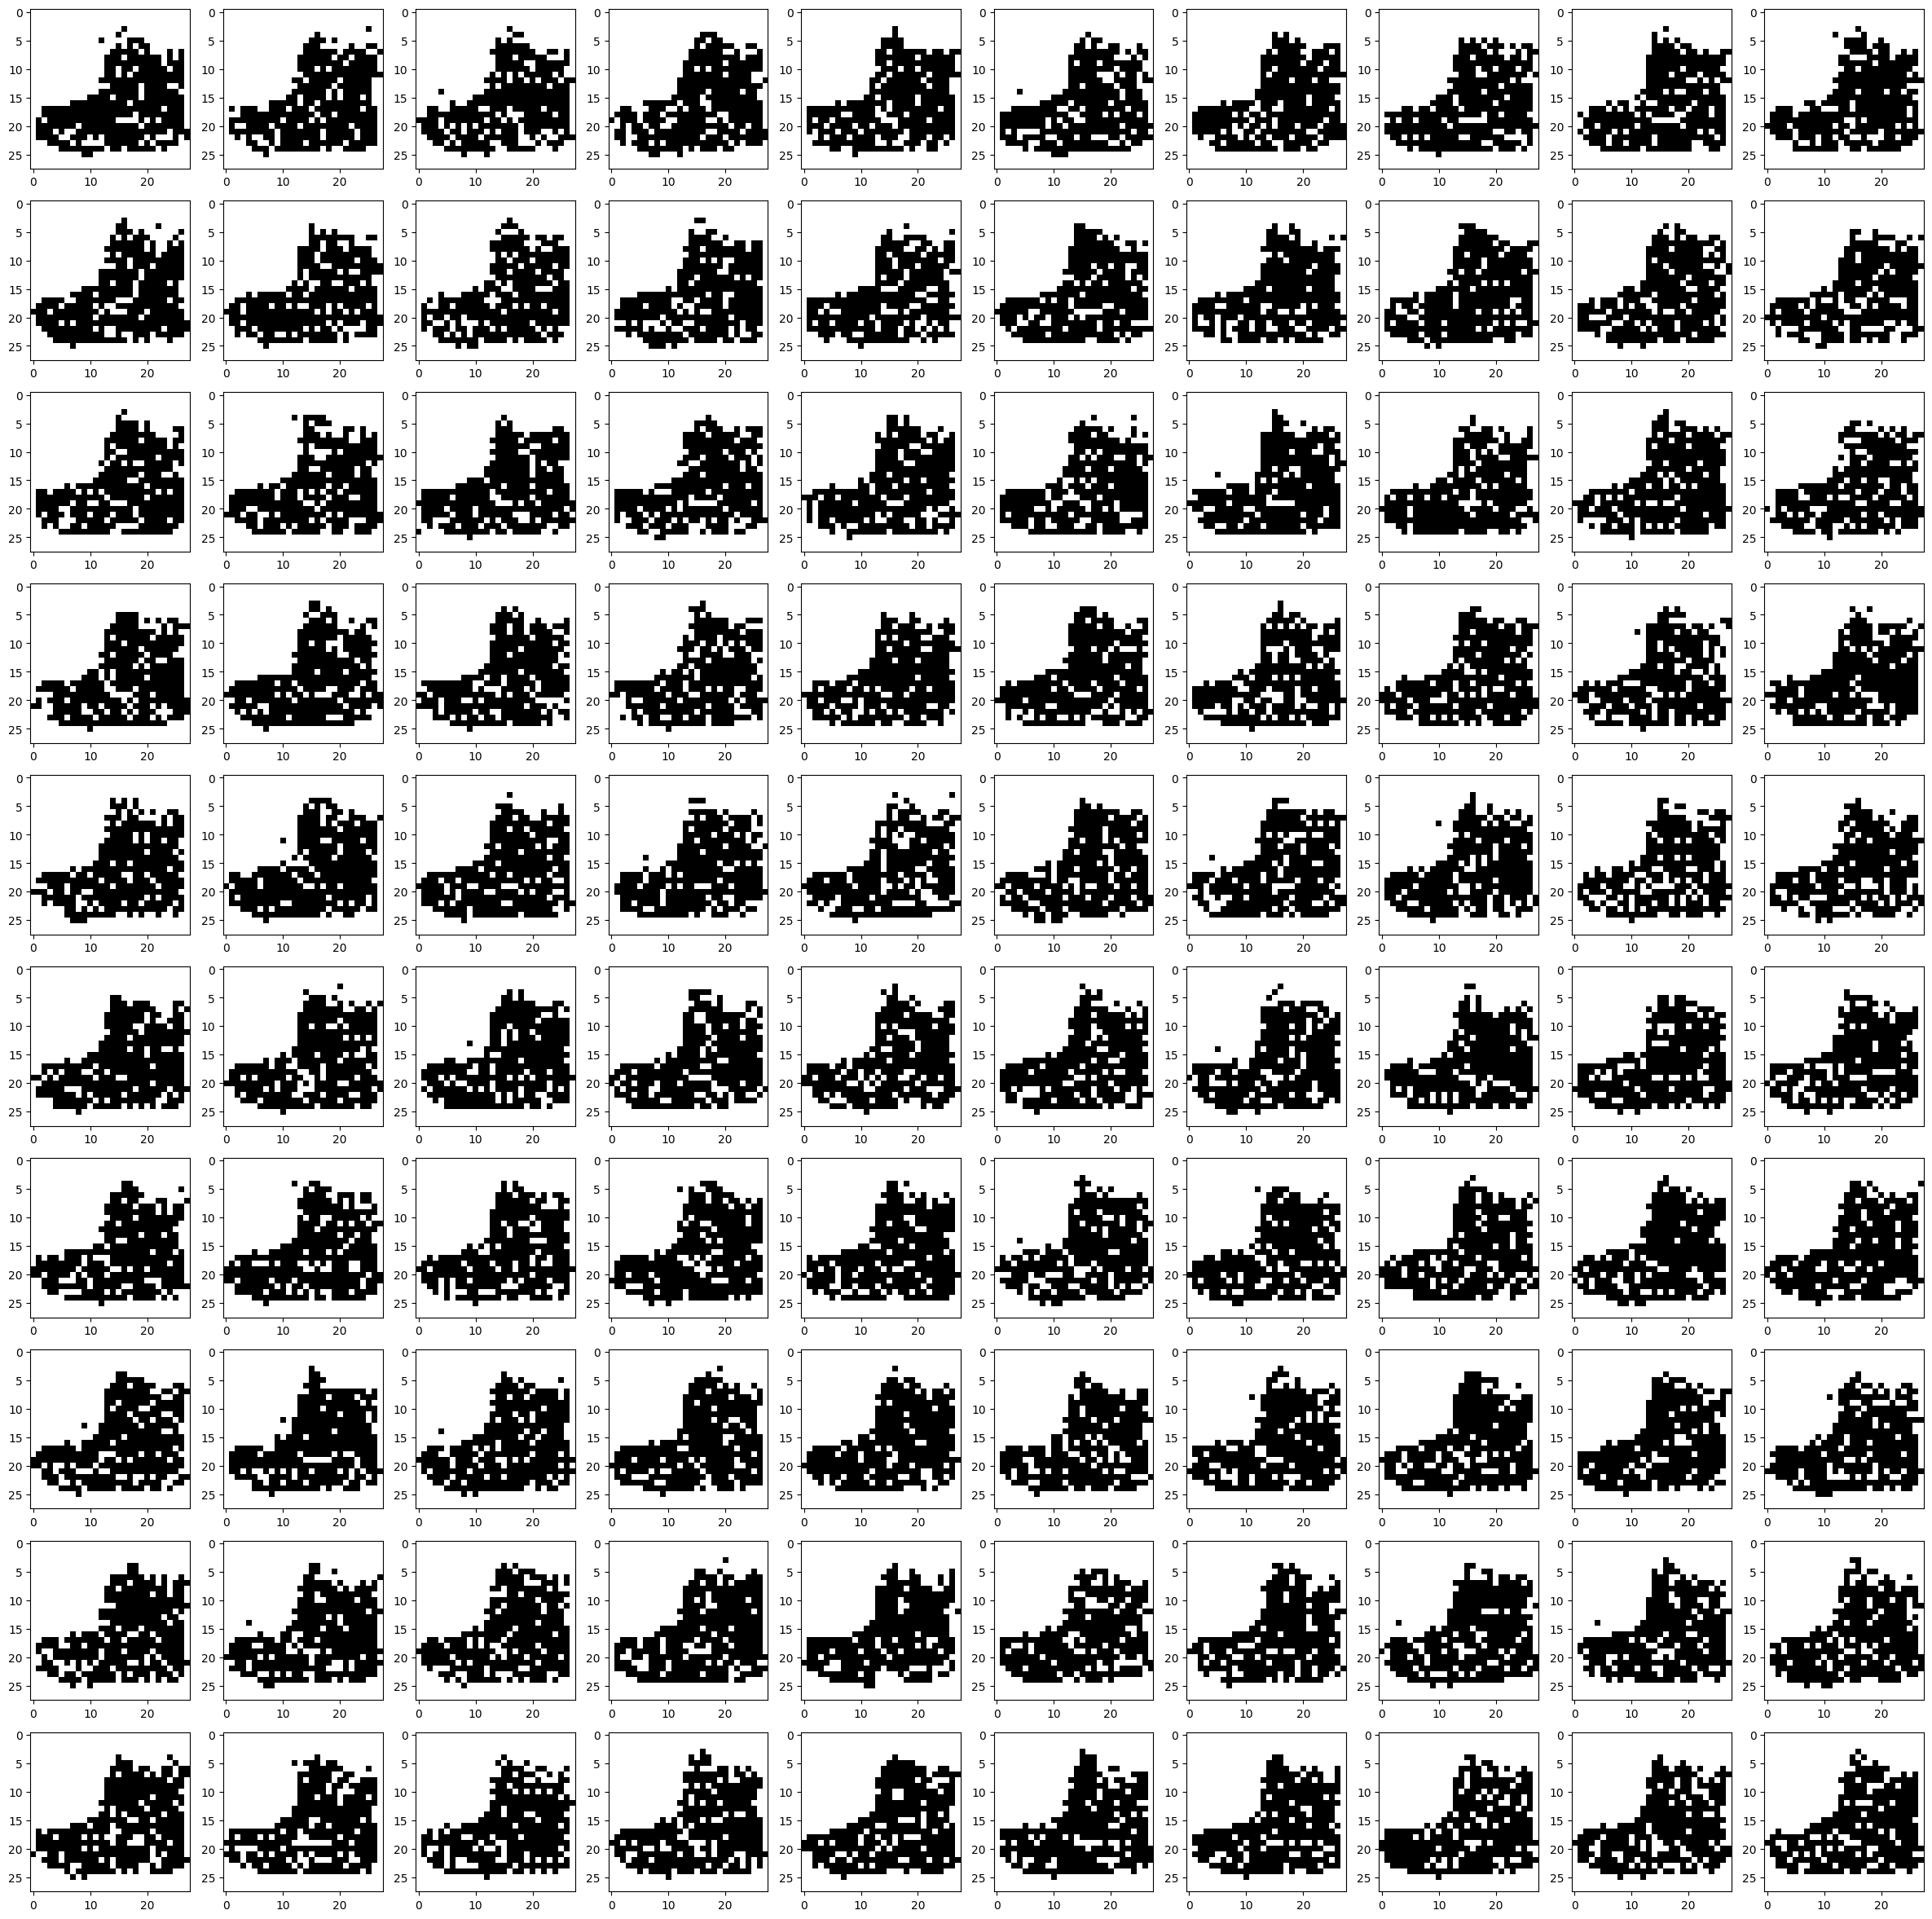

In [ ]:
plt.figure(figsize=(30, 30))
for i in range(num_steps):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(rate_coded_image[:,:,i], plt.cm.binary)

# Latency Coding:

In [ ]:
def get_spike_times(image, tau ,  threshold, epsilon = 1e-7 , tmax = 7):
  # Calculating spike times based on the RC circuit model
  idx = image < threshold
  image = np.clip(image,threshold+epsilon,1e9)
  print(tau*np.log((threshold+epsilon)/ (epsilon)))
  latency_coded = tau*np.log(image/ (image - threshold))
  latency_coded[idx] = tmax
  return latency_coded

In [ ]:
raw_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
get_spike_times(raw_image, tau= 5, threshold=0.1)

69.07755778981887


array([[ 7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.        ,  7.        ,  7.        ,  7.        ,
         7.        ,  7.    

## LIF Neuron structure

In [ ]:
class Neuron:
  def __init__(self, R =5.1, C=5e-3, threshold = 300):
    self.R = R
    self.C = C
    self.curr_membrane_potential=0
    self.membrane_history = []
    self.spike_history = []
    self.threshold =threshold
  def activate(self, W, X):
    tau = self.R*self.C
    beta = np.exp(-1/tau)
    for t in range(num_steps):
      spike = int(self.curr_membrane_potential > self.threshold)
      self.curr_membrane_potential = beta * self.curr_membrane_potential + np.dot(W, X[:, t]).item() - spike * self.threshold
      self.membrane_history.append(self.curr_membrane_potential)
      self.spike_history.append(spike)

## Flattening the input image and initializing the weights randomly

In [ ]:
rate_coded_image

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
rate_coded_image.shape

(28, 28, 100)

In [ ]:
X = rate_coded_image.reshape(28*28, 100)
W = np.random.rand(1, 28*28) / 100

In [ ]:
W.shape

(1, 784)

## Creating one layer with 10 Neurons

In [ ]:
layer = [Neuron() for i in range(10)]

## Forward propagating and plotting membrane potential and spikes

In [ ]:
for neuron in layer:
  W = np.ones((1, 28*28))
  neuron.activate(W, X)

In [ ]:
for neuron in layer:
  print(neuron.membrane_history)

[305.0, 0.0, 295.0, 296.0, 283.0, 290.0, 293.0, 307.0, 13.0, 298.0, 301.0, 11.0, 295.0, 293.0, 298.0, 301.0, 4.0, 308.0, -4.0, 298.0, 301.0, 3.0, 297.0, 292.0, 314.0, -3.0, 294.0, 293.0, 302.0, 5.0, 298.0, 305.0, 12.0, 308.0, -12.0, 293.0, 285.0, 302.0, -1.0, 287.0, 303.0, 6.0, 299.0, 300.0, 292.0, 297.0, 299.0, 294.0, 294.0, 305.0, 7.0, 295.0, 290.0, 300.0, 313.0, 10.0, 302.0, -3.0, 308.0, 4.0, 303.0, 3.0, 307.0, 4.0, 302.0, -3.0, 288.0, 288.0, 305.0, -5.0, 304.0, -7.0, 300.0, 296.0, 301.0, 7.0, 304.0, 1.0, 298.0, 290.0, 304.0, -5.0, 289.0, 304.0, -4.0, 290.0, 299.0, 308.0, 9.0, 303.0, -8.0, 299.0, 313.0, 6.0, 308.0, 11.0, 309.0, 4.0, 311.0, -11.0]
[305.0, 0.0, 295.0, 296.0, 283.0, 290.0, 293.0, 307.0, 13.0, 298.0, 301.0, 11.0, 295.0, 293.0, 298.0, 301.0, 4.0, 308.0, -4.0, 298.0, 301.0, 3.0, 297.0, 292.0, 314.0, -3.0, 294.0, 293.0, 302.0, 5.0, 298.0, 305.0, 12.0, 308.0, -12.0, 293.0, 285.0, 302.0, -1.0, 287.0, 303.0, 6.0, 299.0, 300.0, 292.0, 297.0, 299.0, 294.0, 294.0, 305.0, 7.0, 29

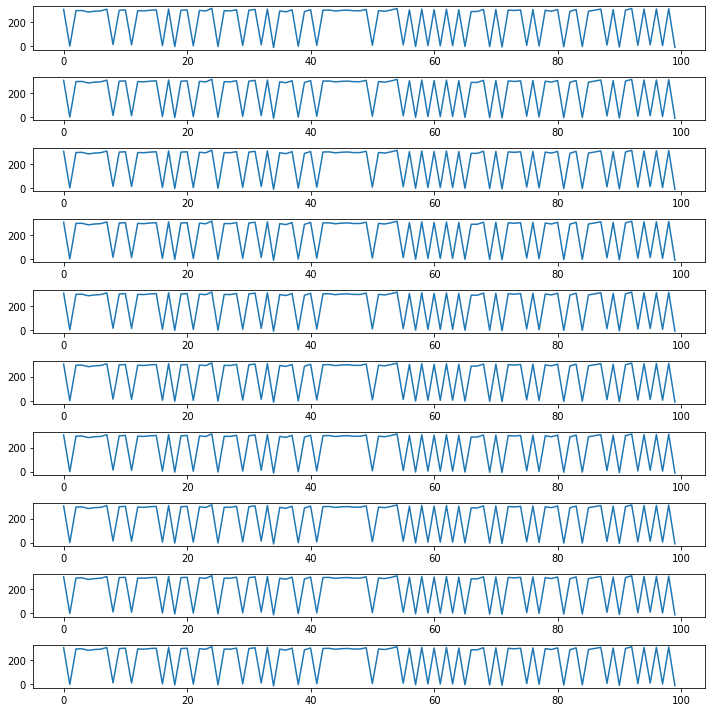

In [ ]:
fig, ax = plt.subplots(10, 1)
for i in range(10):
  ax[i].plot(range(num_steps), layer[i].membrane_history)
  fig.set_figheight(10)
  fig.set_figwidth(10)
  fig.tight_layout()

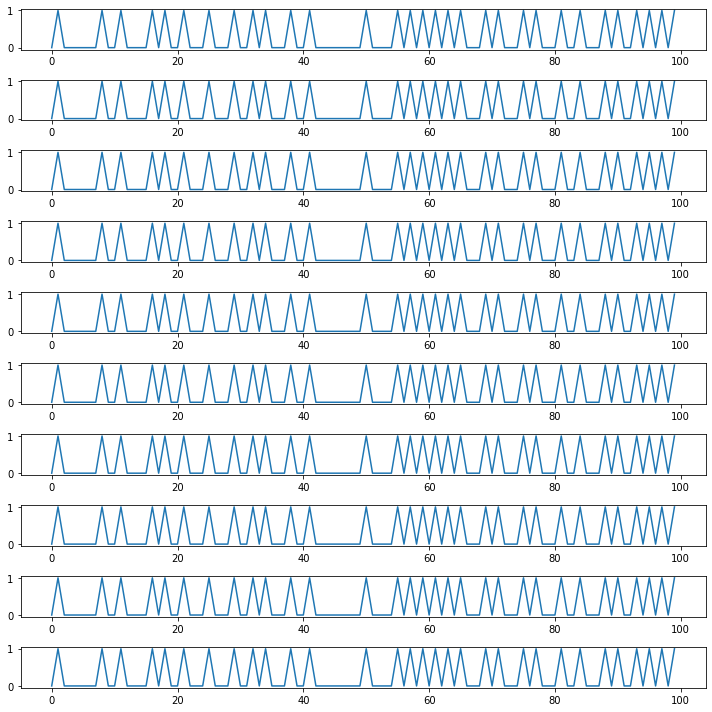

In [ ]:
fig, ax = plt.subplots(10, 1)
for i in range(10):
  ax[i].plot(range(num_steps), layer[i].spike_history)
  fig.set_figheight(10)
  fig.set_figwidth(10)
  fig.tight_layout()